## Importing neccessary libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
import matplotlib.pyplot as plt

## Loading data

In [2]:
raw=pd.read_csv(r"K:\Desktop\NIIT\tables\DS2_C6_S3_CarSales_Data_Practice.csv")
raw.head()

Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       CL              14.114               18.225    Passenger   
3        Acura       RL               8.588               29.725    Passenger   
4         Audi       A4              20.397               22.255    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8       140.0      101.2   67.3   172.4   
1               28.40          3.2       225.0      108.1   70.3   192.9   
2                 NaN          3.2       225.0      106.9   70.6   192.0   
3               42.00          3.5       210.0      114.6   71.4   196.6   
4               23.99          1.8       150.0      102.6   68.2   178.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0        2.639           13.2             28.0      2/2/2012   
1        3.517           17.2             25.0      6/3/2011   
2        3.470           17.2             26.0      1/4/2012   
3        3.850           18.0             22.0     3/10/2011   
4        2.998           16.4             27.0     10/8/2011   

   Power_perf_factor  
0          58.280150  
1          91.370778  
2                NaN  
3          91.389779  
4          62.777639

## Summarizing data

In [3]:
cars=raw.drop("__year_resale_value",axis=1)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    object 
 1   Model               157 non-null    object 
 2   Sales_in_thousands  157 non-null    float64
 3   Vehicle_type        157 non-null    object 
 4   Price_in_thousands  155 non-null    float64
 5   Engine_size         156 non-null    float64
 6   Horsepower          156 non-null    float64
 7   Wheelbase           156 non-null    float64
 8   Width               156 non-null    float64
 9   Length              156 non-null    float64
 10  Curb_weight         155 non-null    float64
 11  Fuel_capacity       156 non-null    float64
 12  Fuel_efficiency     154 non-null    float64
 13  Latest_Launch       157 non-null    object 
 14  Power_perf_factor   155 non-null    float64
dtypes: float64(11), object(4)
memory usage: 18.5+ KB


## Data preprocessing

In [4]:
def preprocess(df):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    num_cols = df.select_dtypes(include=['int', 'float']).columns
    encoder = LabelEncoder()
    for col in cat_cols:
        df[col].fillna(df[col].mode()[0],inplace=True)
        df[col] = encoder.fit_transform(df[col])
    scaler = MinMaxScaler()
    for item in num_cols:
        df[item].fillna(df[item].mean(),inplace=True)
        
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df

final=preprocess(cars)

In [5]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [6]:
X = final.values

In [7]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    int32  
 1   Model               157 non-null    int32  
 2   Sales_in_thousands  157 non-null    float64
 3   Vehicle_type        157 non-null    int32  
 4   Price_in_thousands  157 non-null    float64
 5   Engine_size         157 non-null    float64
 6   Horsepower          157 non-null    float64
 7   Wheelbase           157 non-null    float64
 8   Width               157 non-null    float64
 9   Length              157 non-null    float64
 10  Curb_weight         157 non-null    float64
 11  Fuel_capacity       157 non-null    float64
 12  Fuel_efficiency     157 non-null    float64
 13  Latest_Launch       157 non-null    int32  
 14  Power_perf_factor   157 non-null    float64
dtypes: float64(11), int32(4)
memory usage: 16.1 KB


## Dendrogram

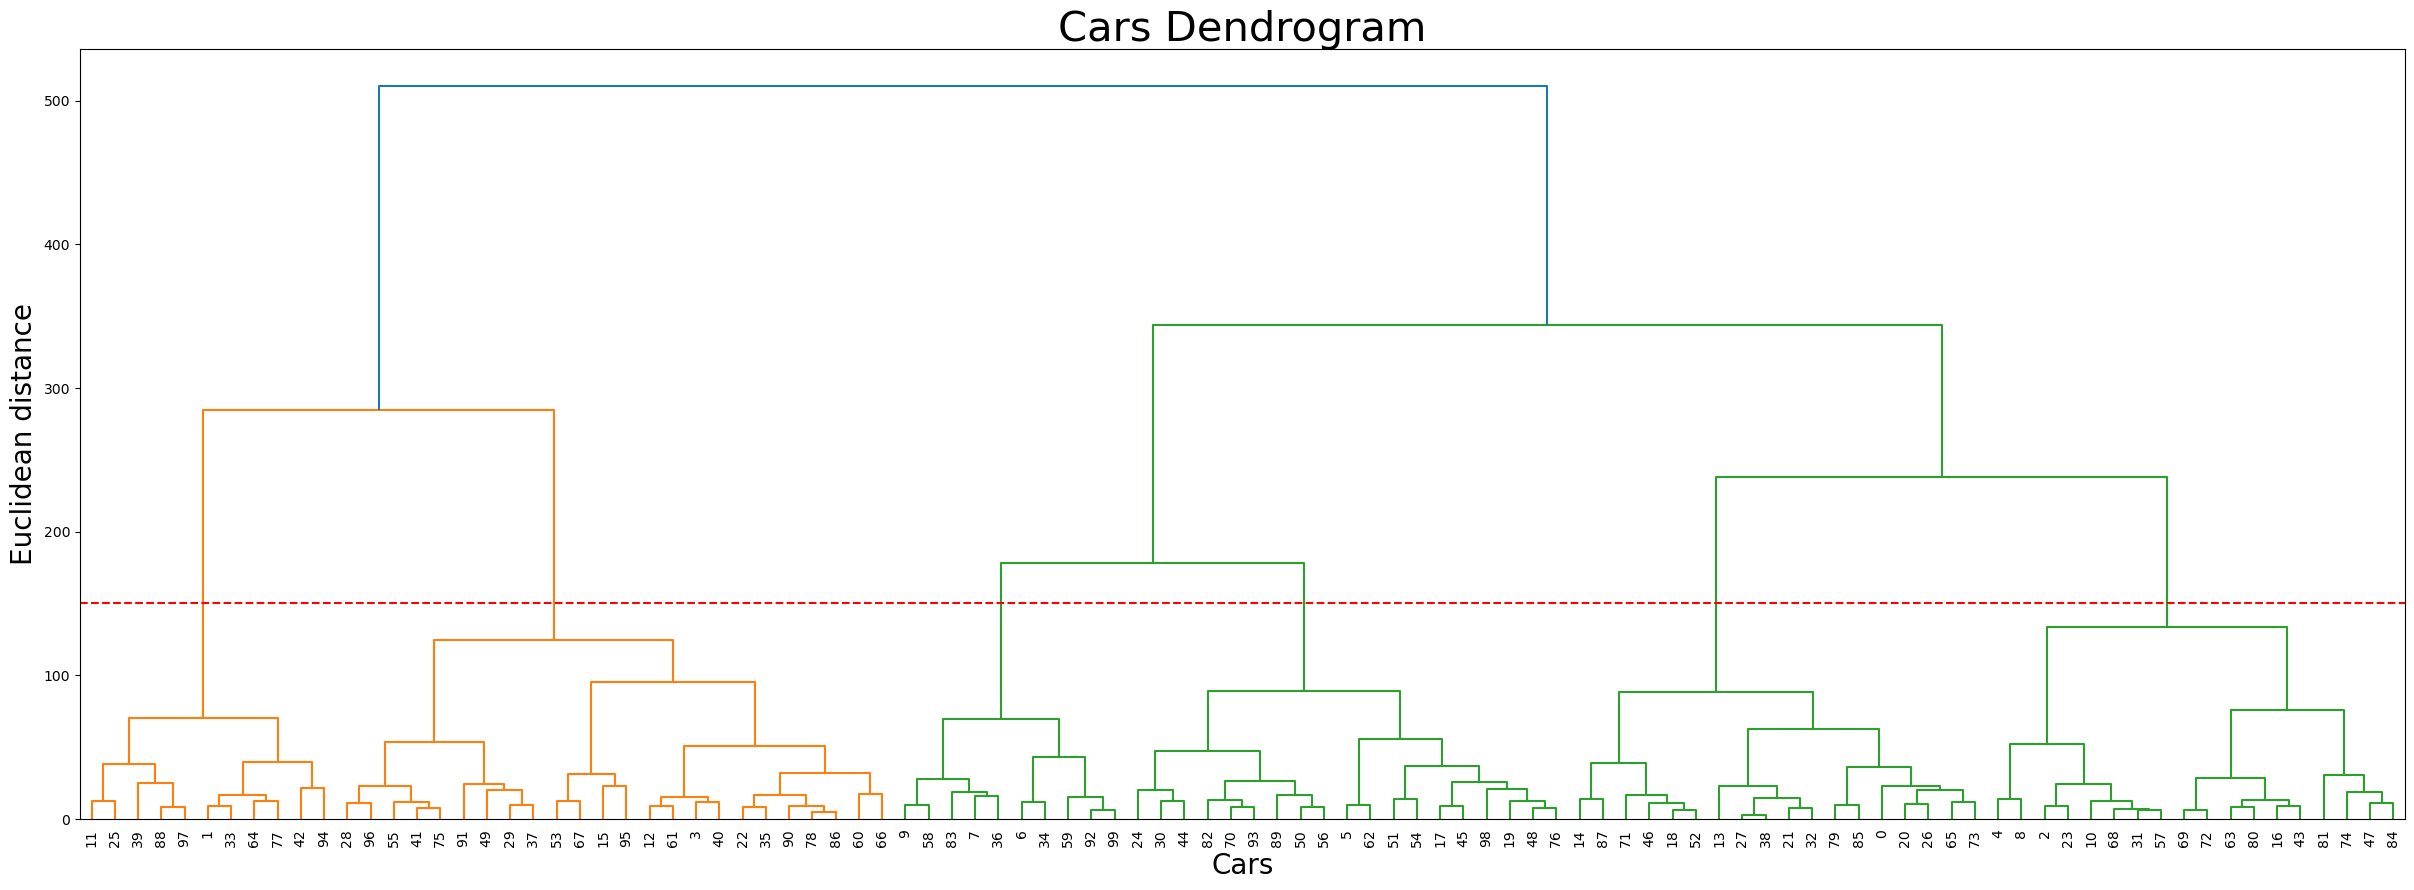

In [17]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X[:100], method = 'ward'),labels=final.index[:100])
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.axhline(y=150, color='r', linestyle='--')
plt.title('Cars Dendrogram',fontsize=30)
plt.xlabel('Cars',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

## Model building and clustering

In [9]:
hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")
y_hc=hc.fit_predict(X)

In [10]:
cars.shape

(157, 15)

In [11]:
from itertools import combinations

numbers = range(0, 15)
combs = combinations(numbers, 2)

coms=[]
for item in combs:
    coms.append(item)

In [12]:
len(coms)

105

## To find the best possible combinations of attributes

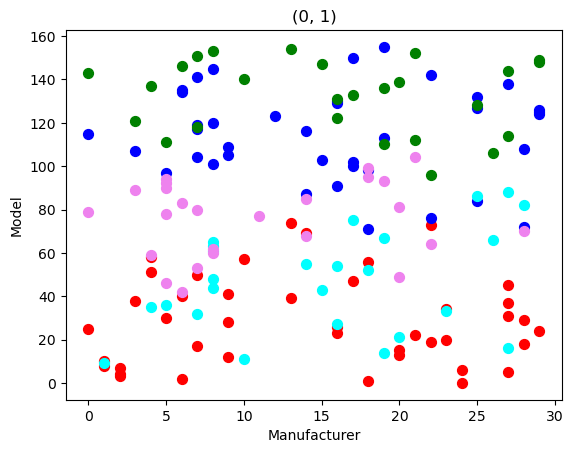

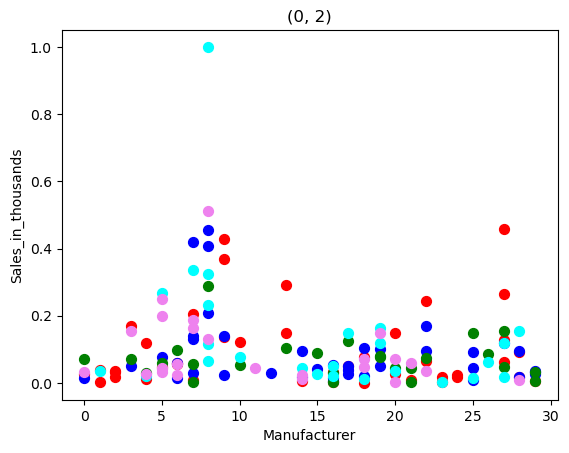

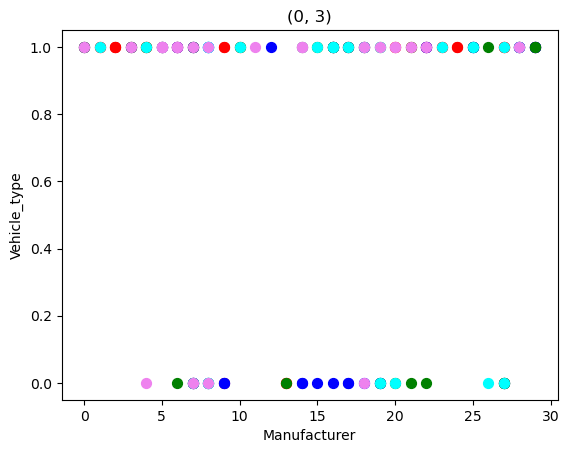

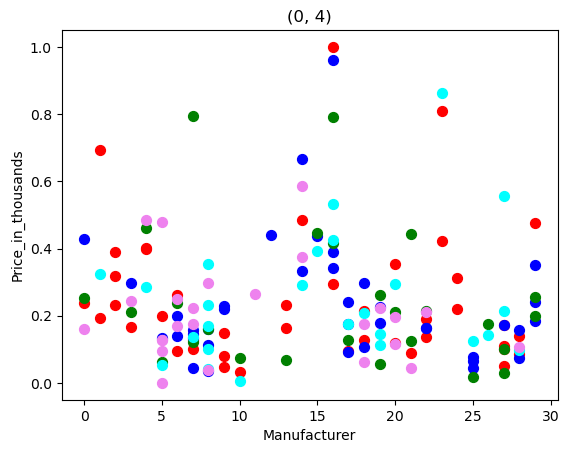

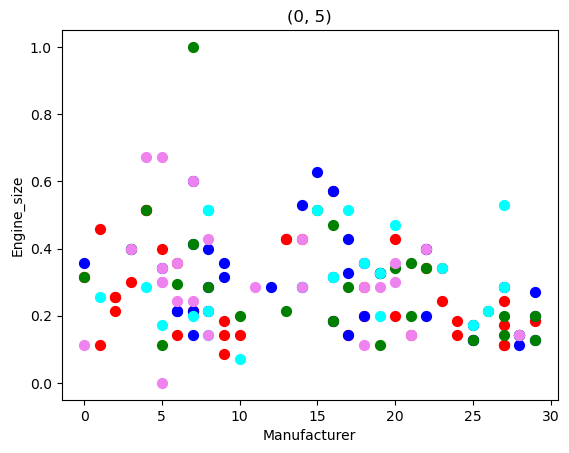

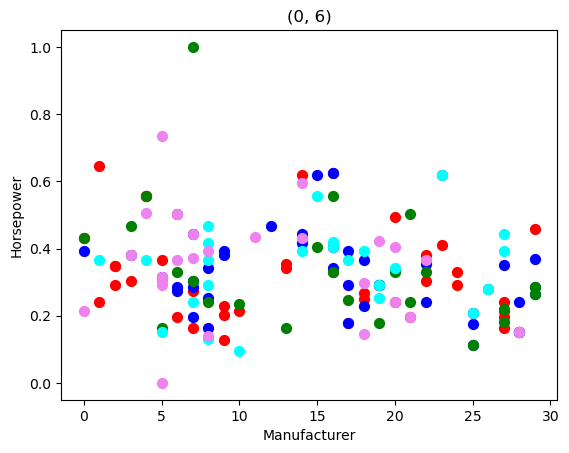

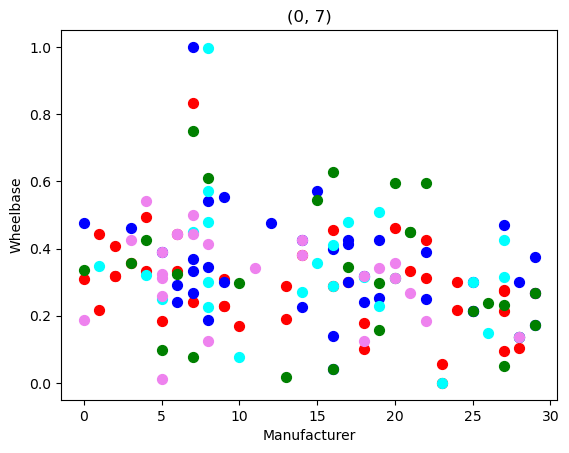

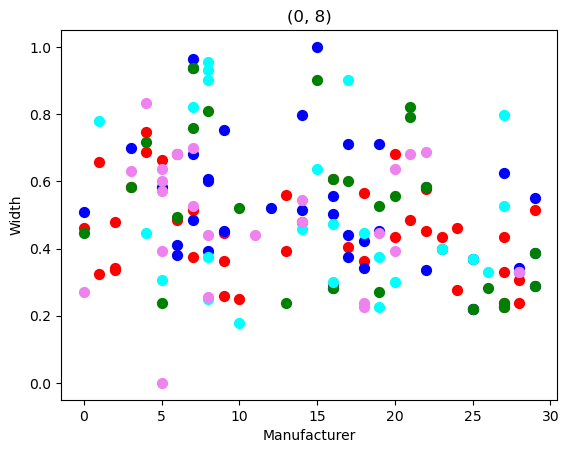

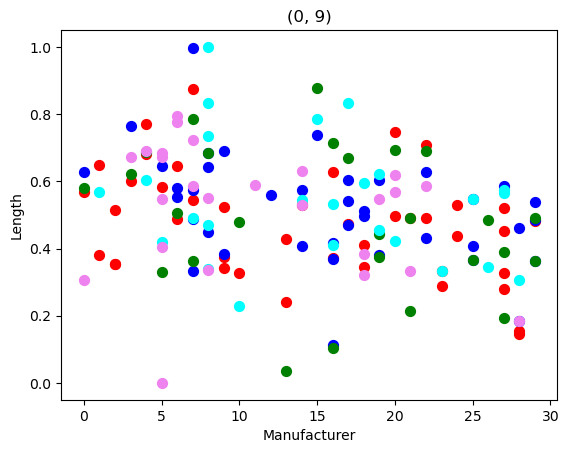

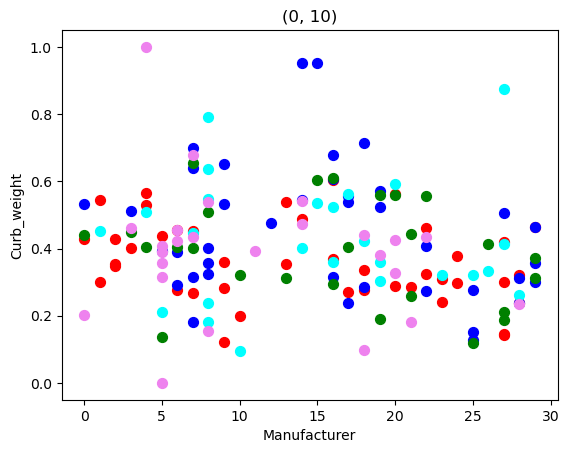

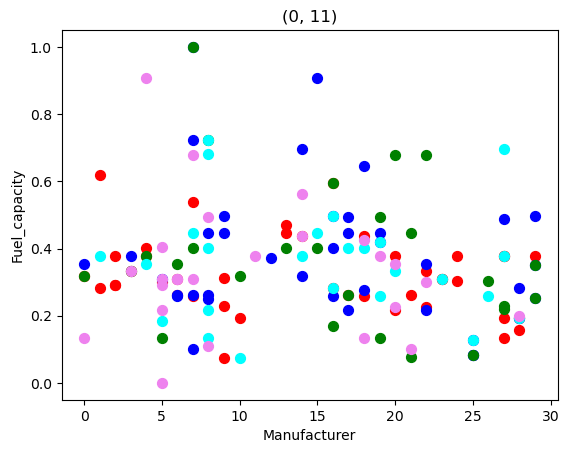

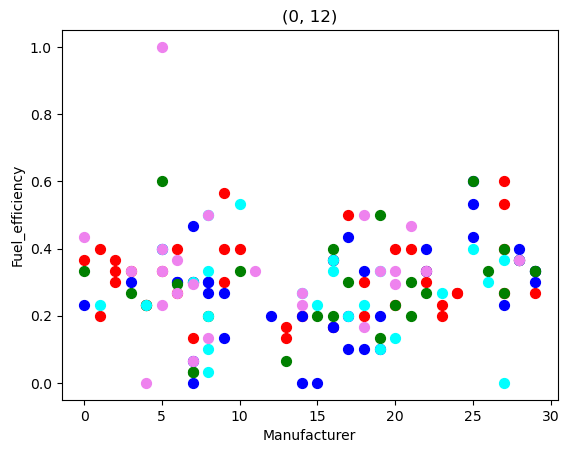

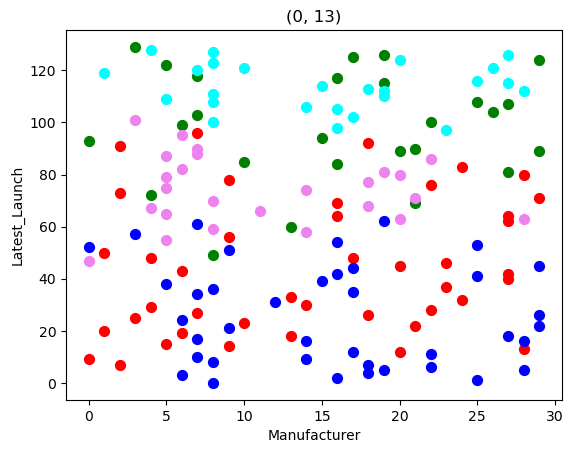

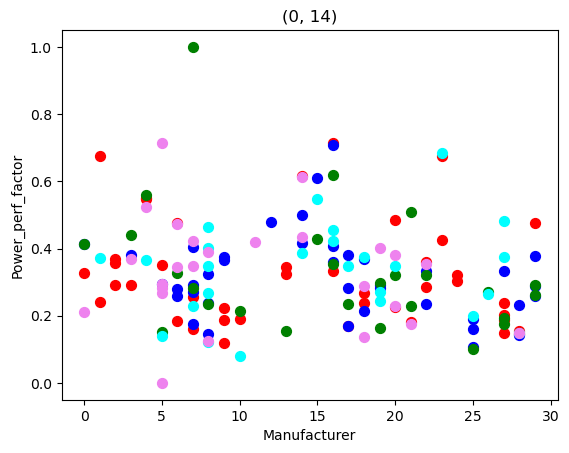

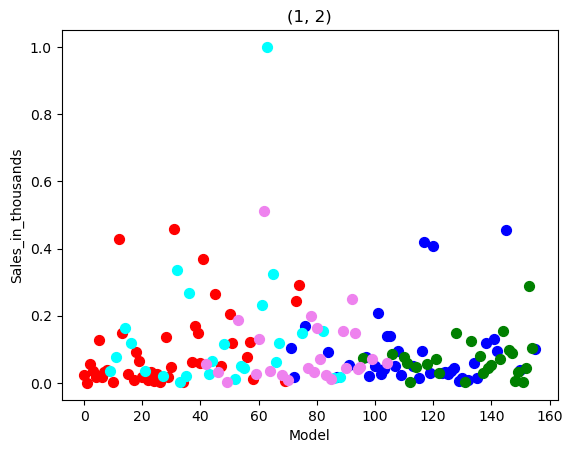

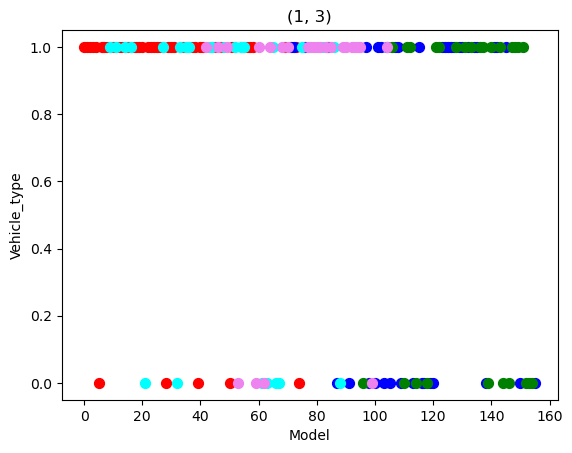

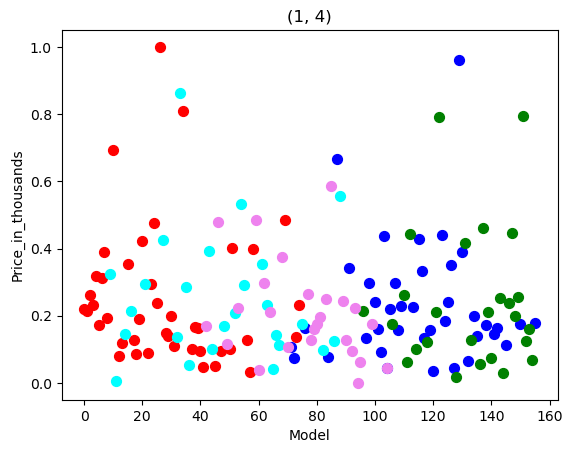

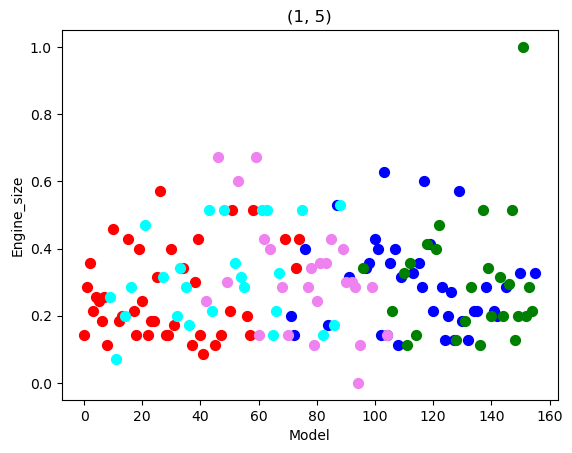

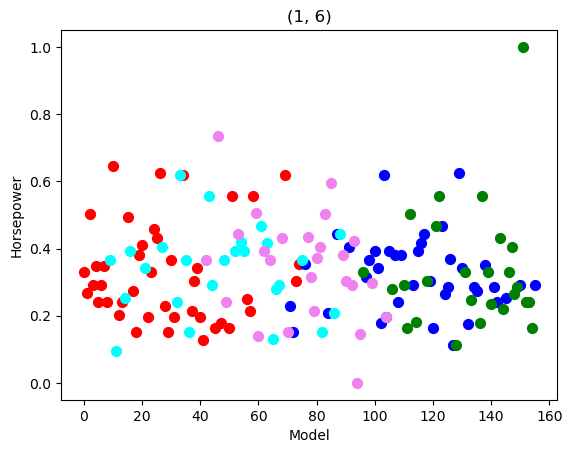

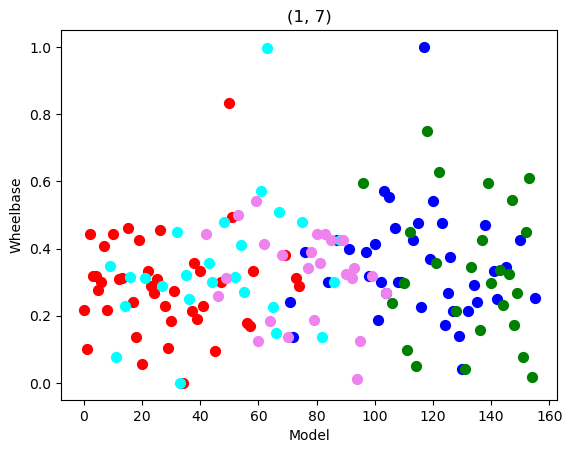

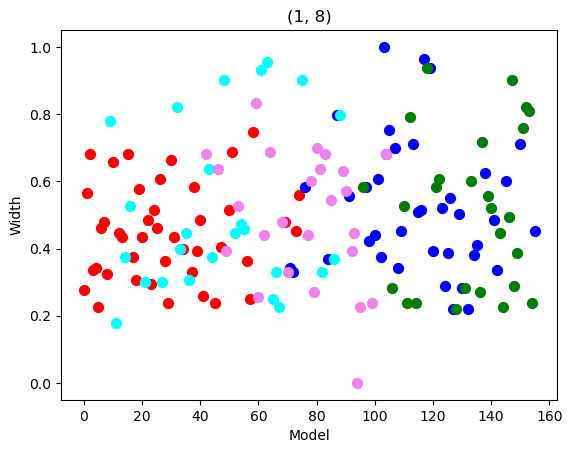

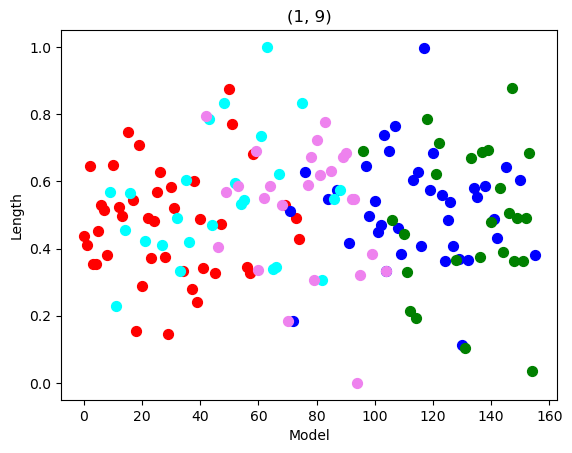

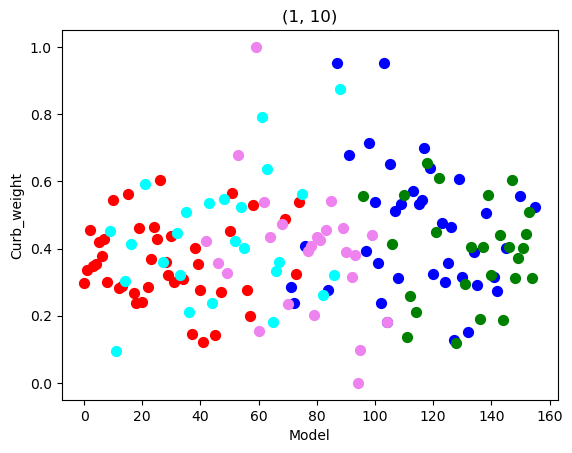

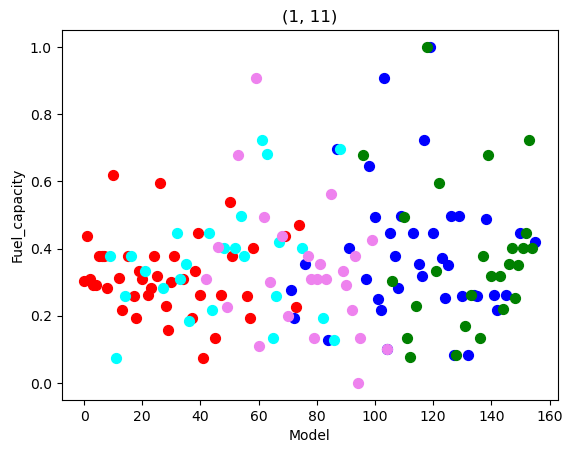

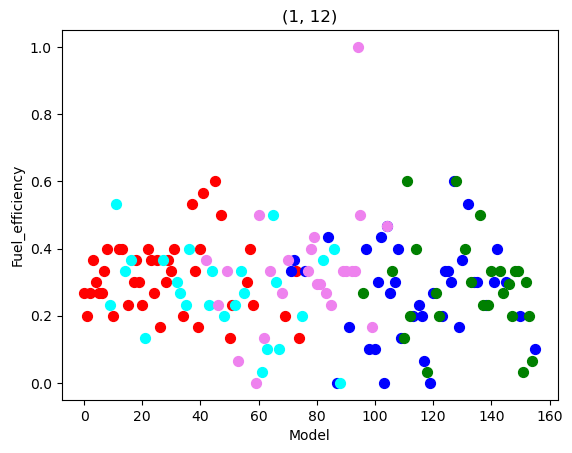

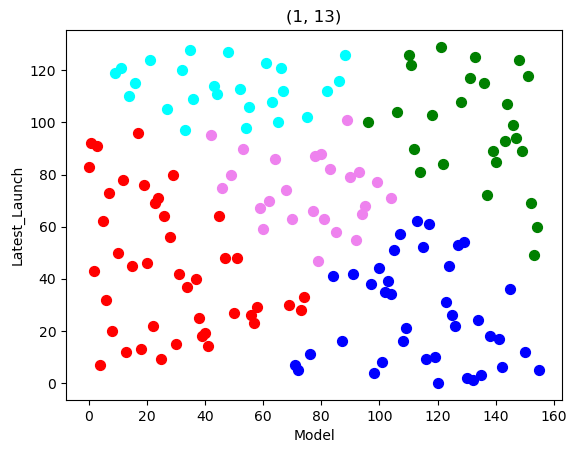

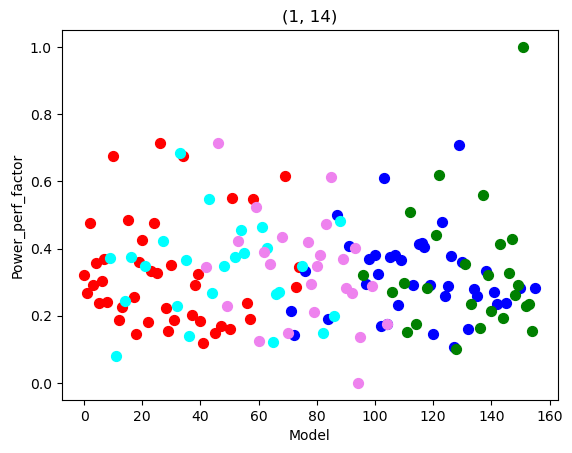

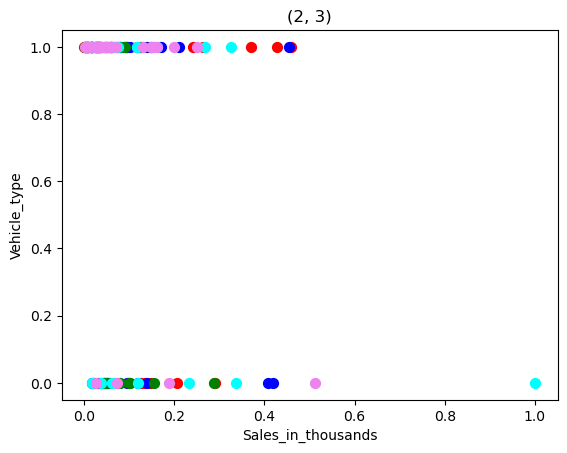

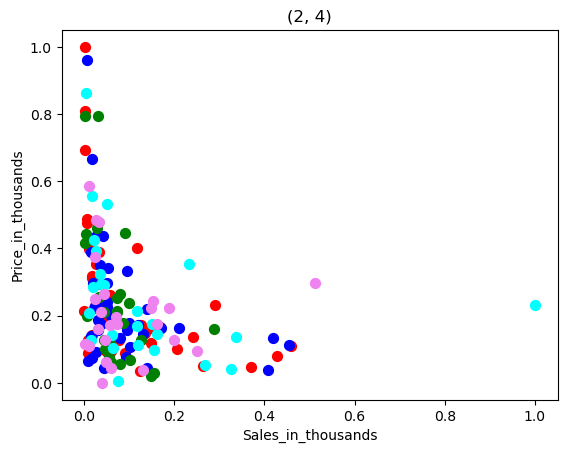

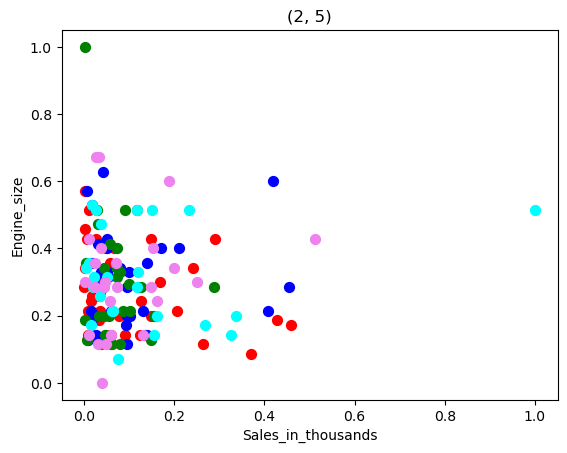

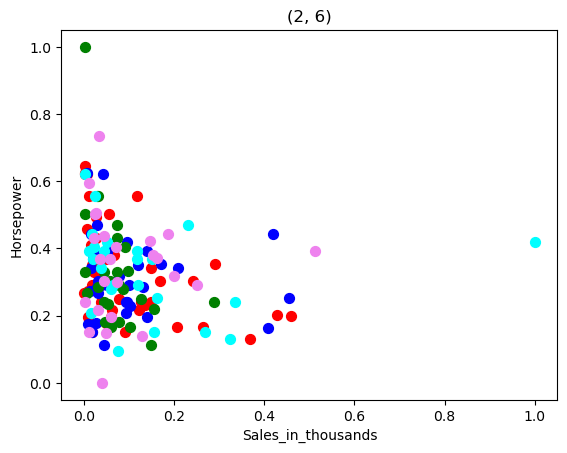

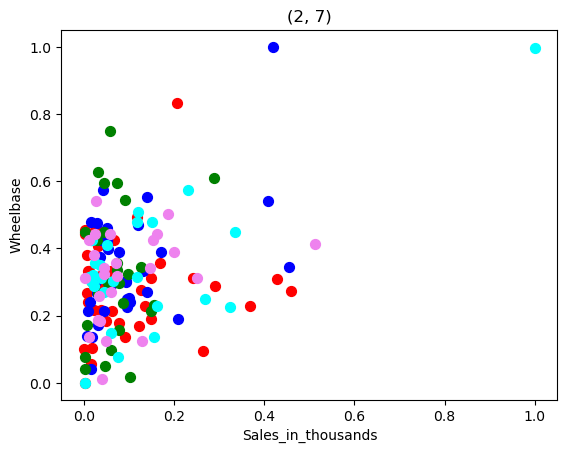

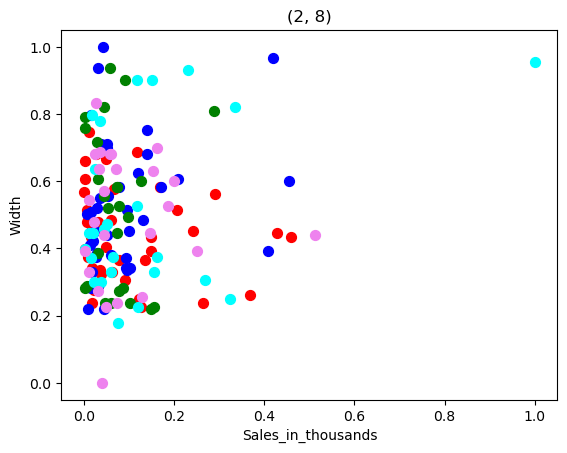

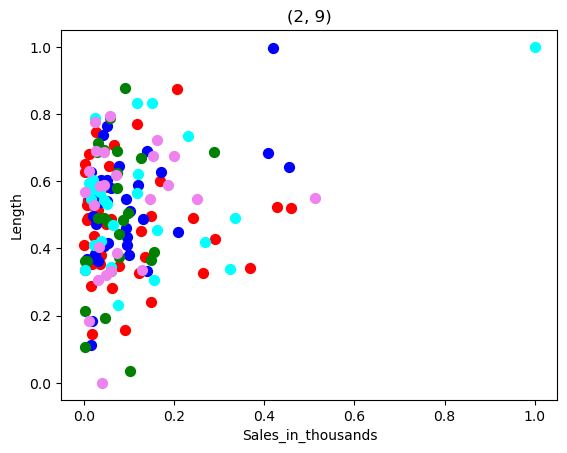

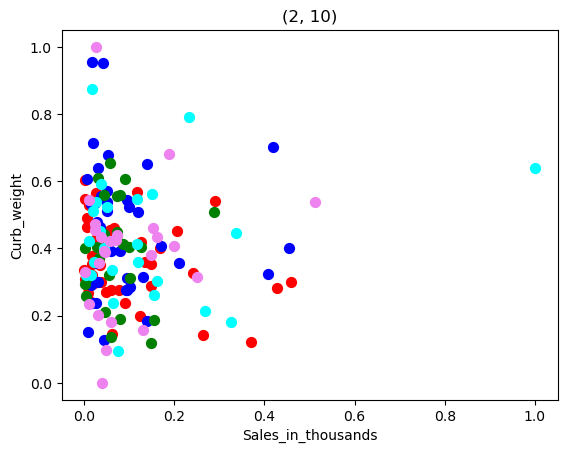

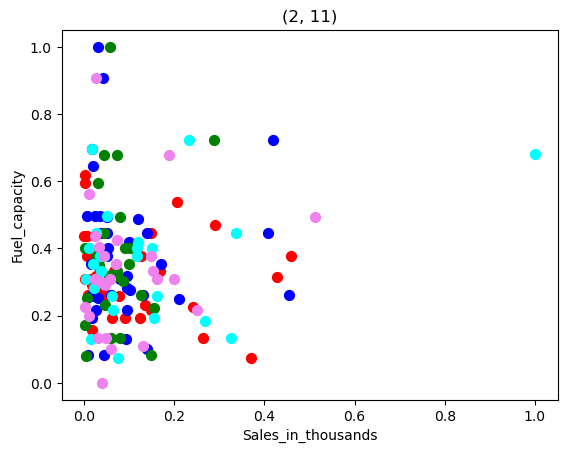

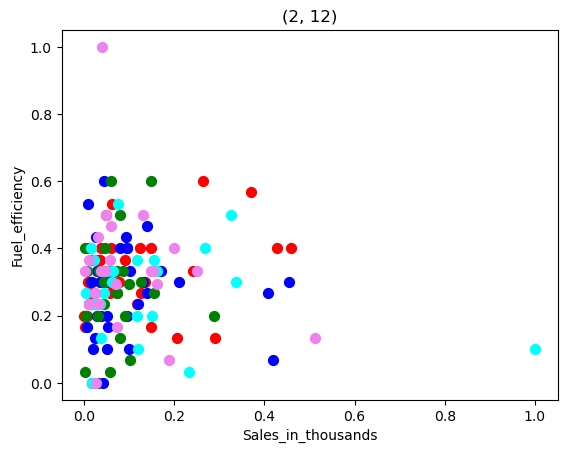

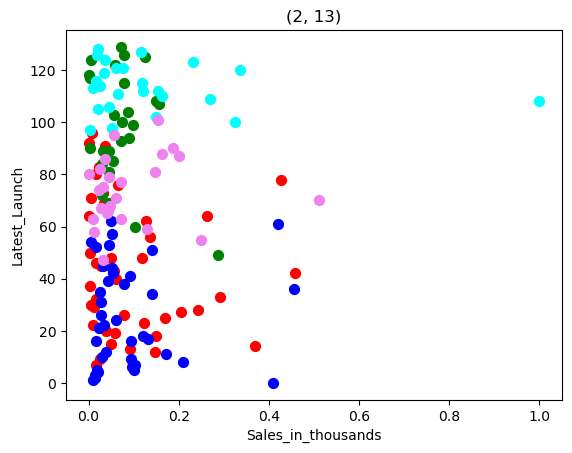

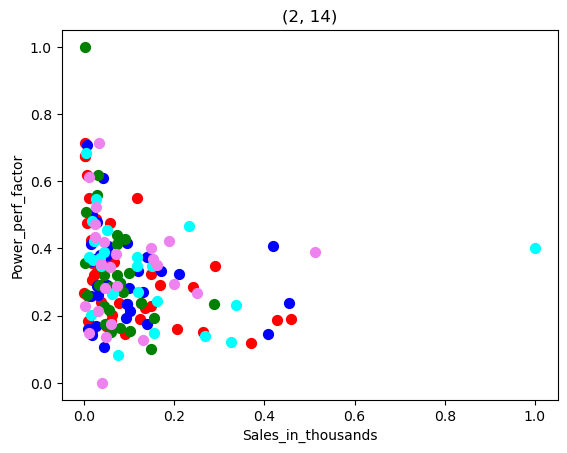

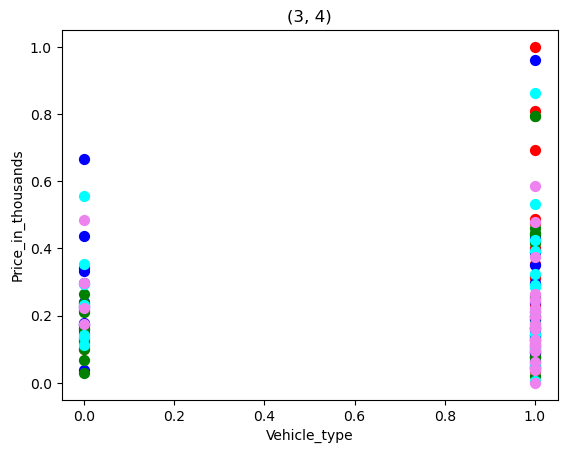

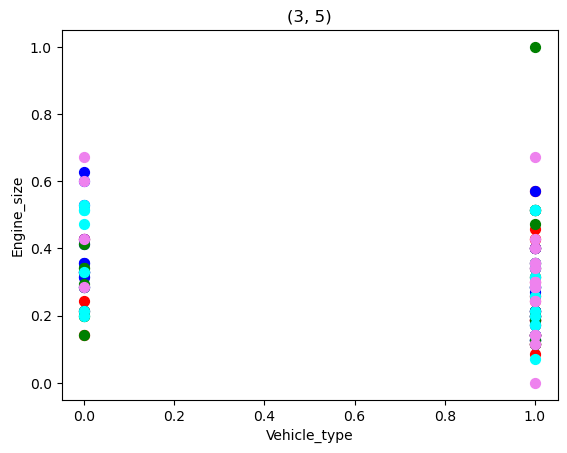

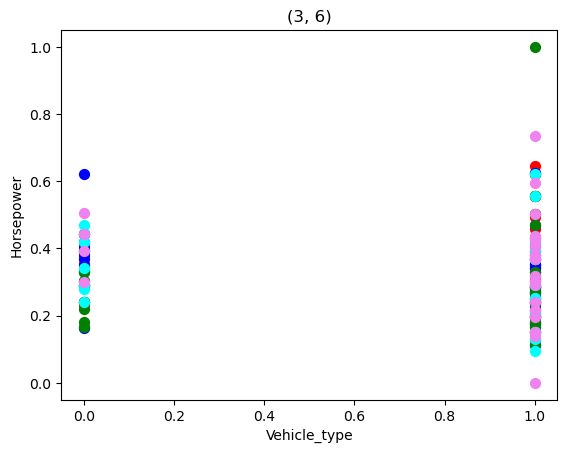

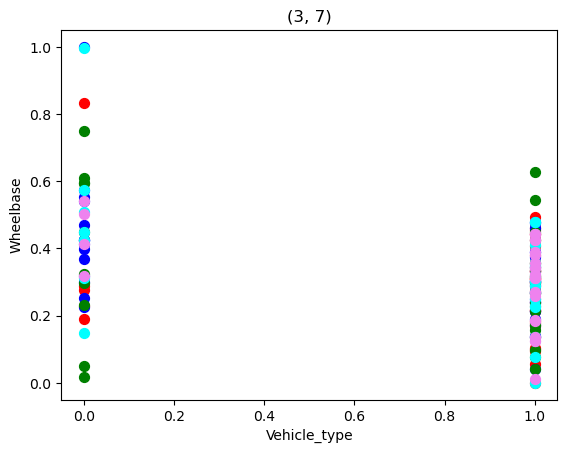

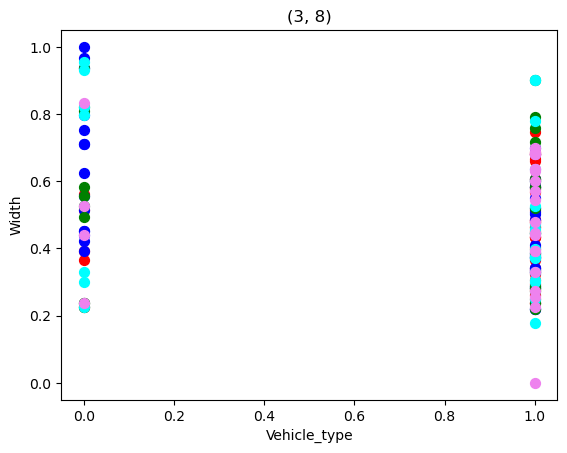

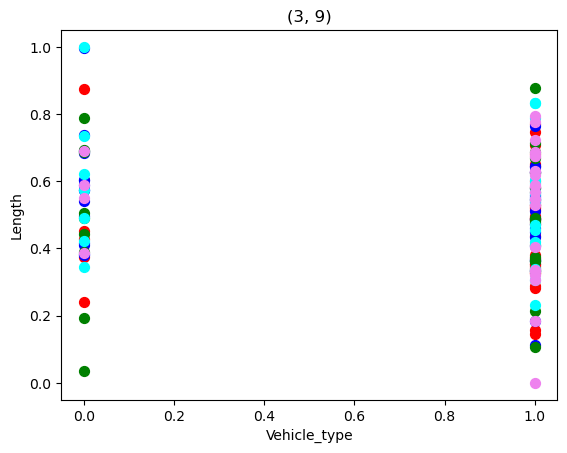

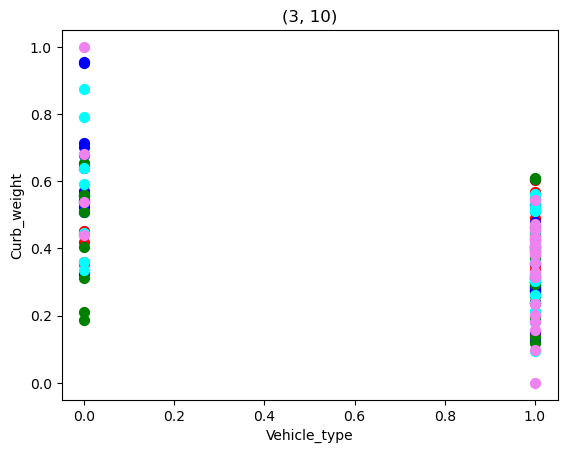

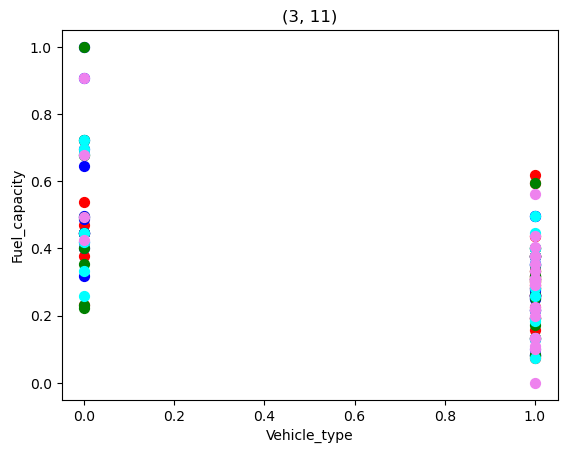

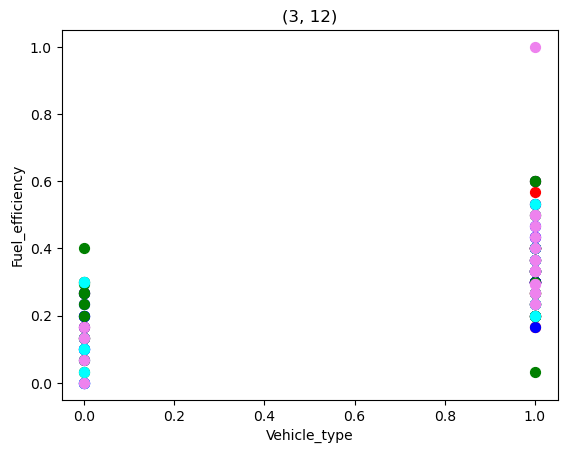

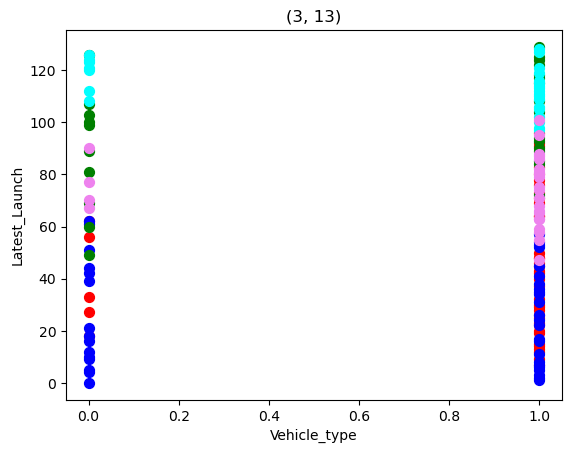

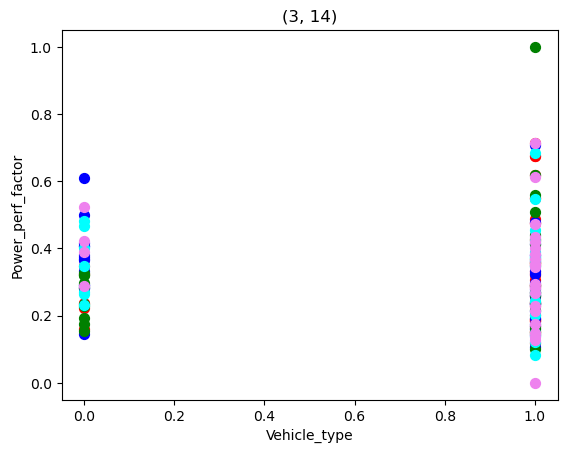

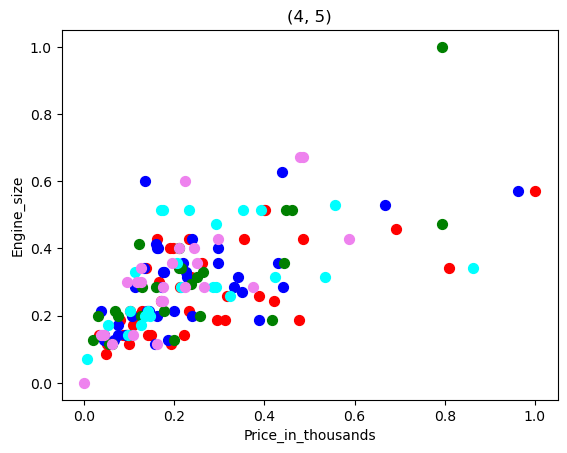

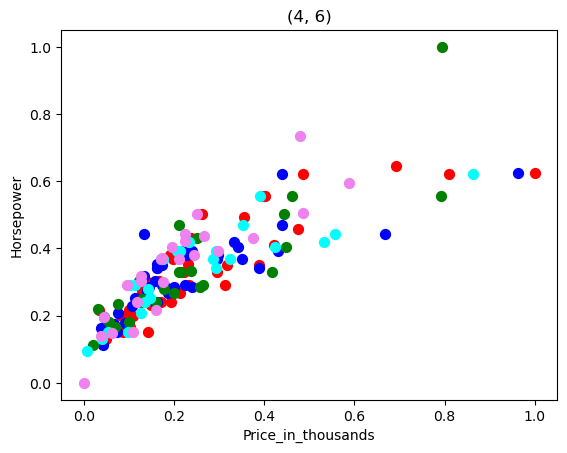

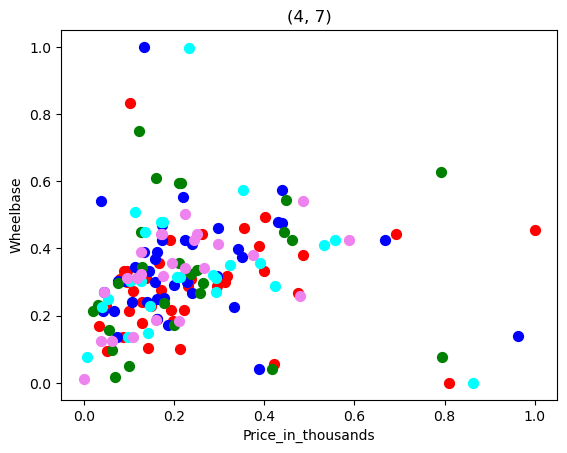

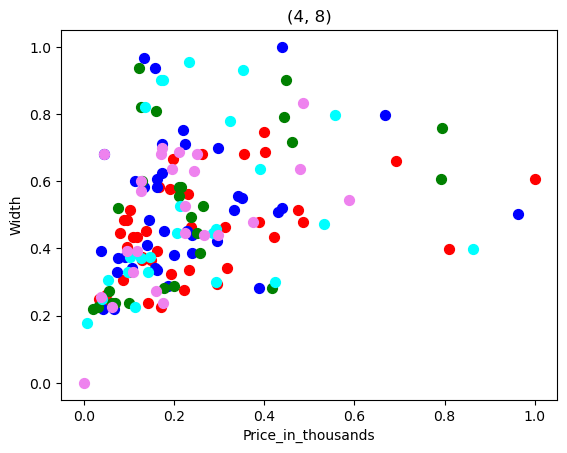

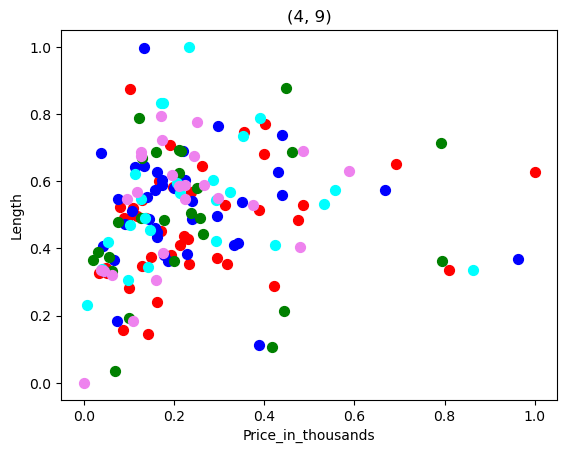

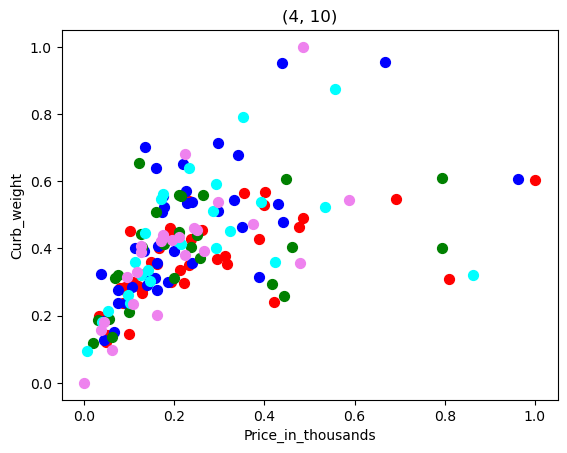

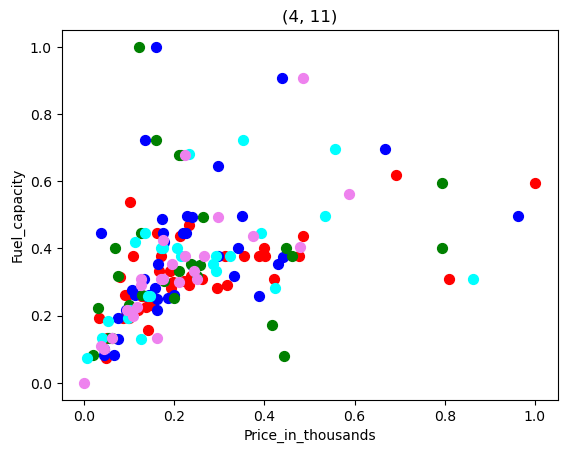

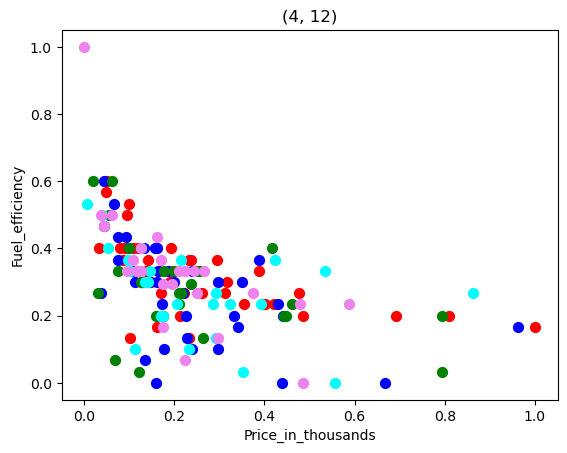

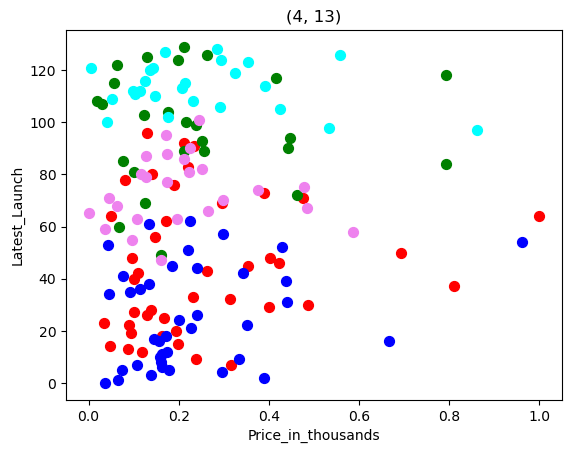

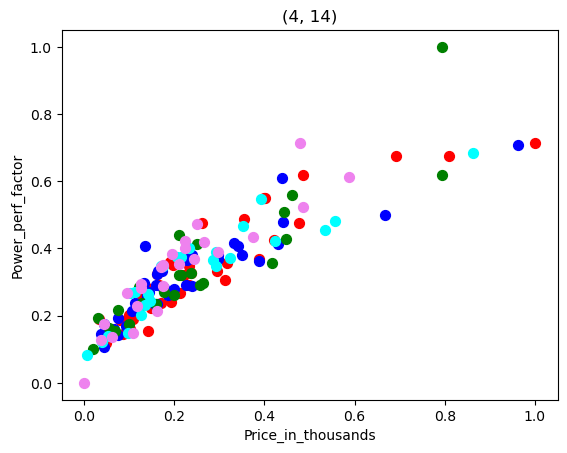

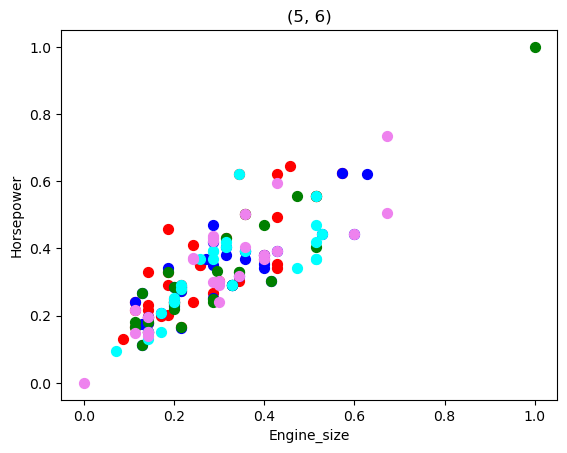

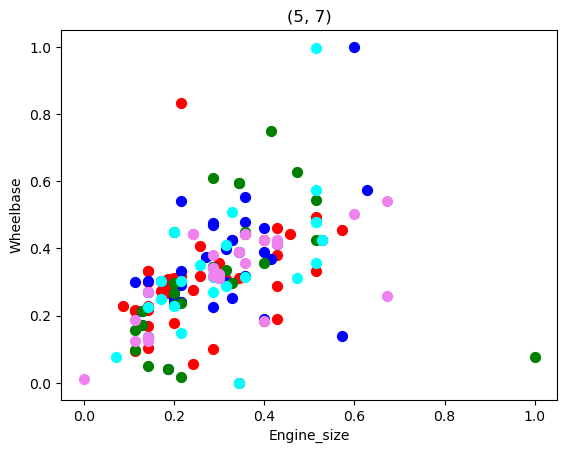

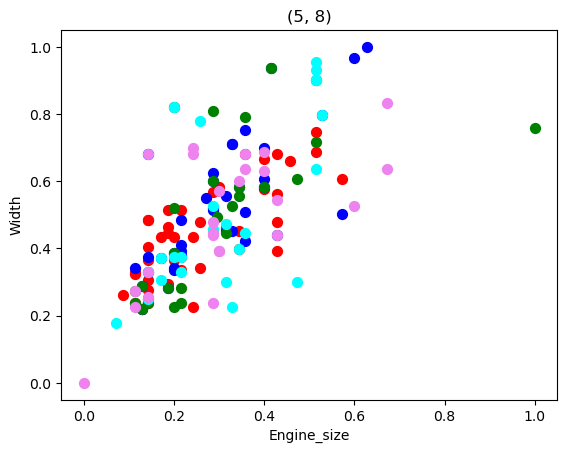

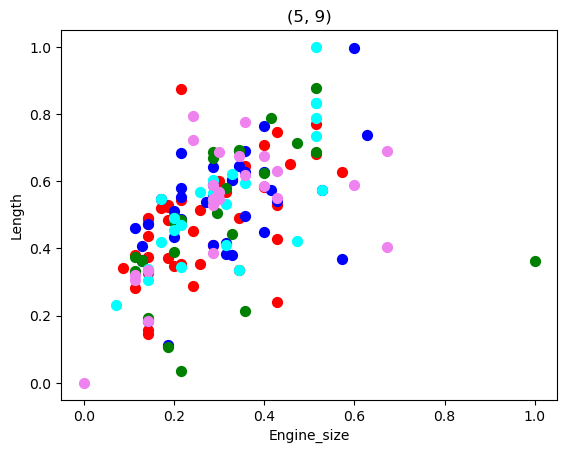

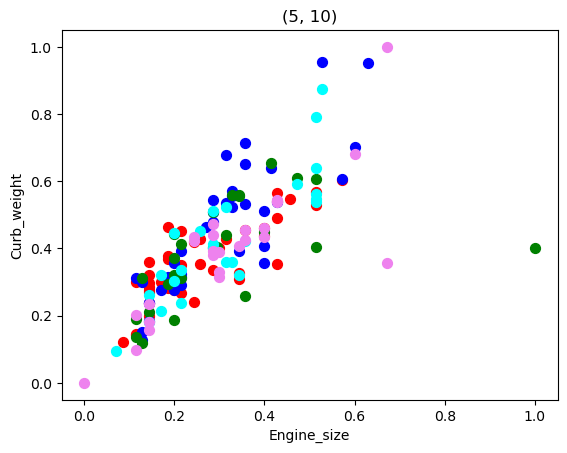

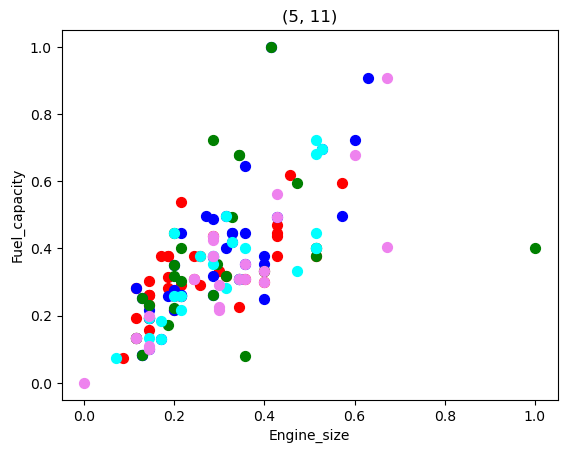

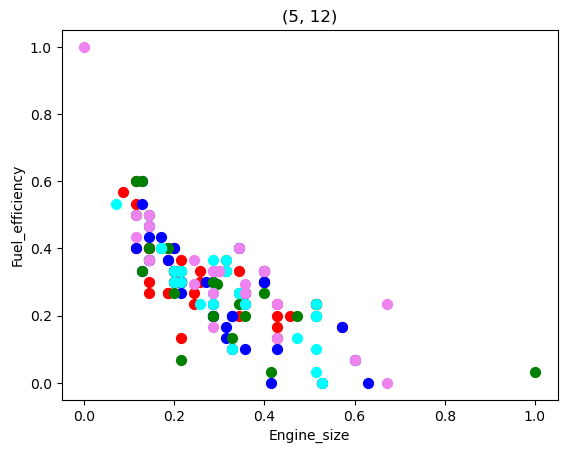

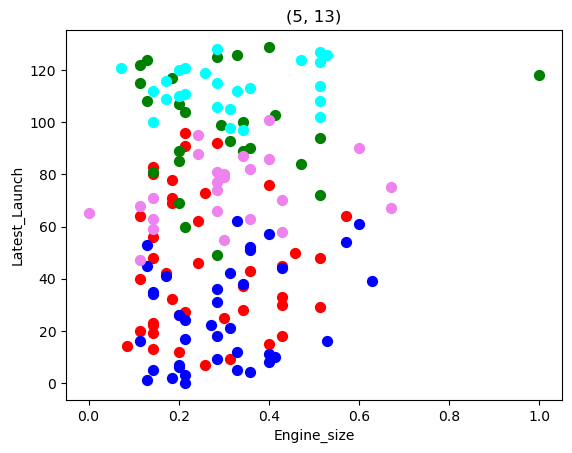

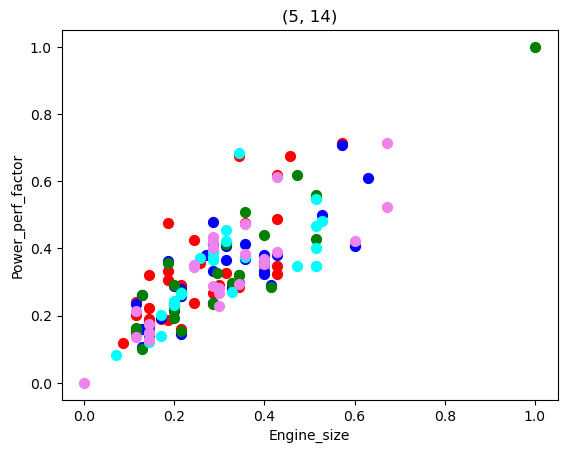

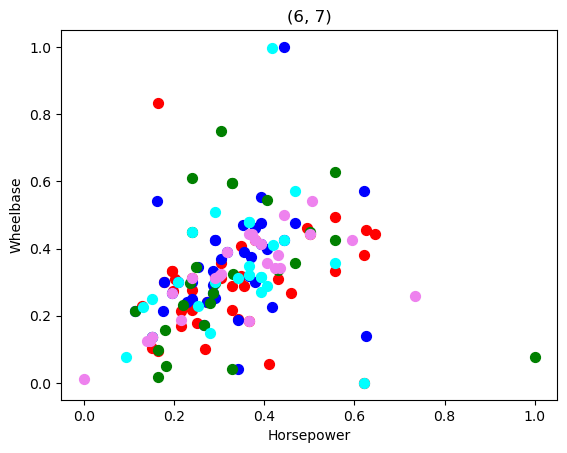

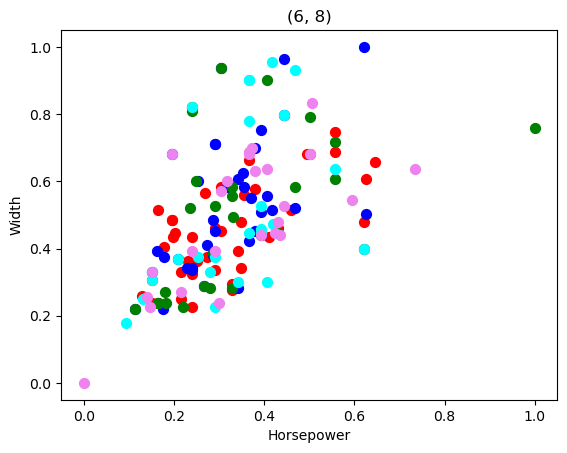

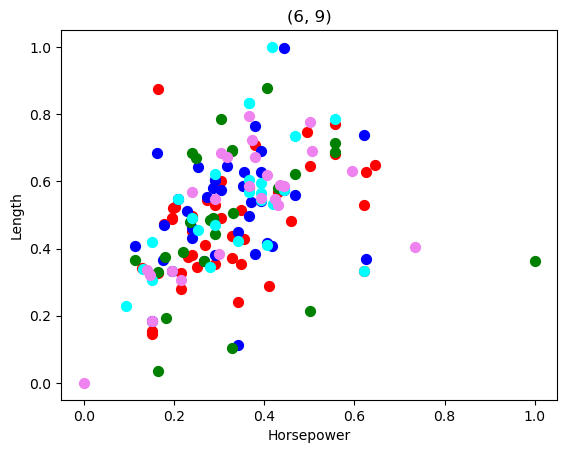

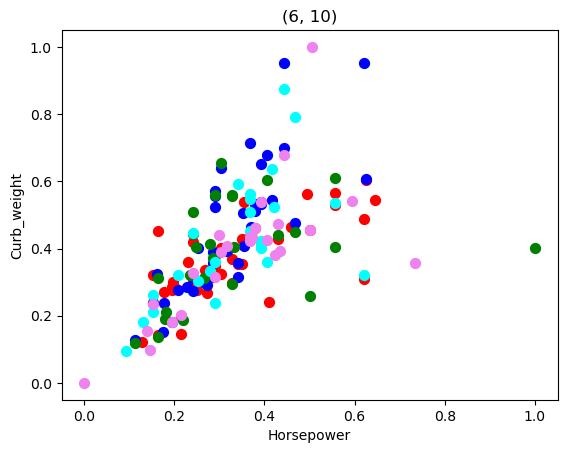

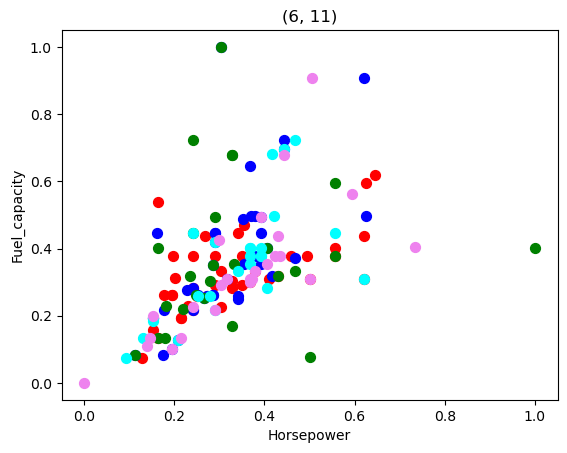

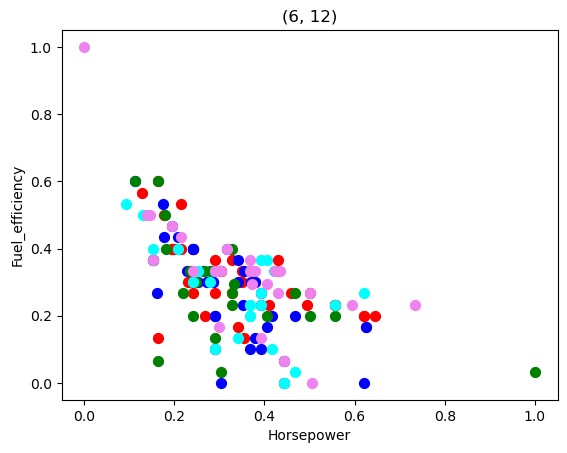

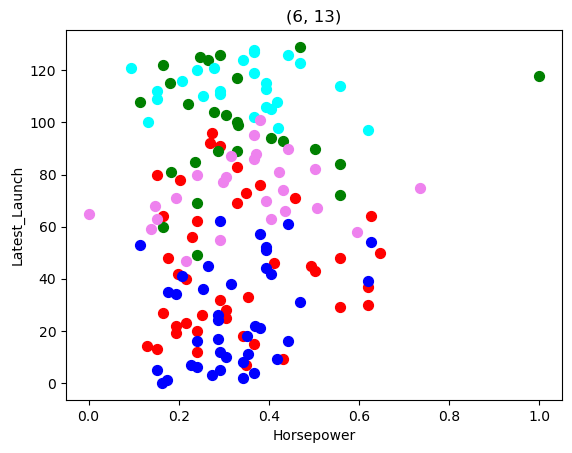

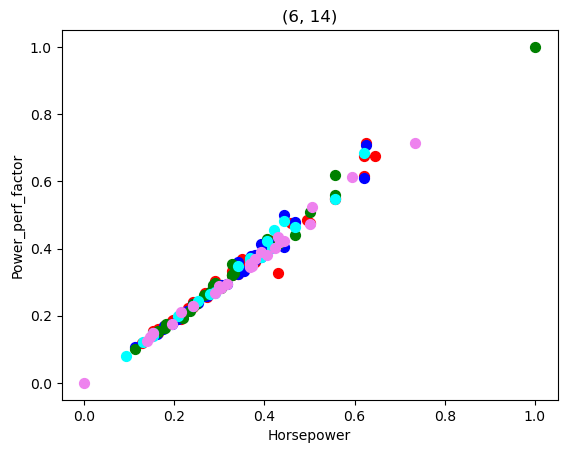

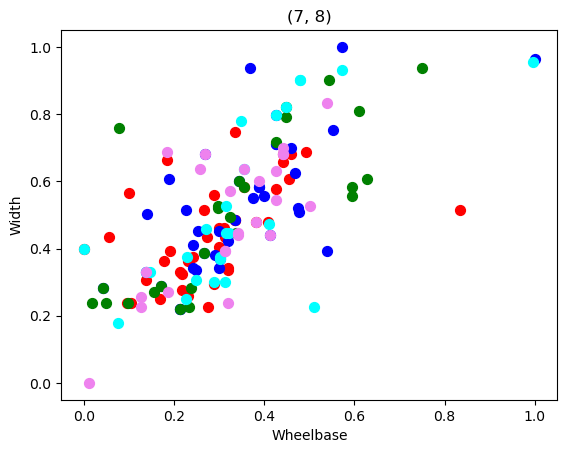

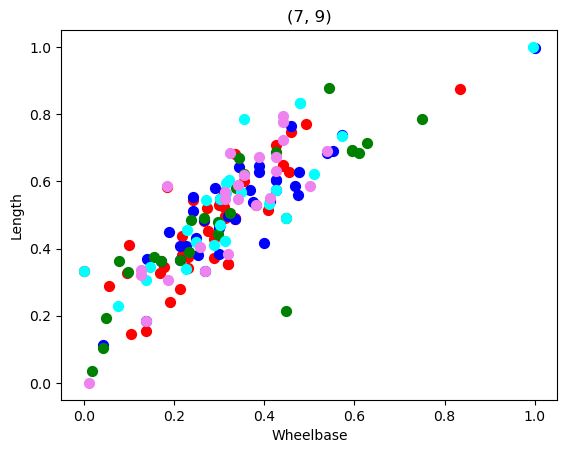

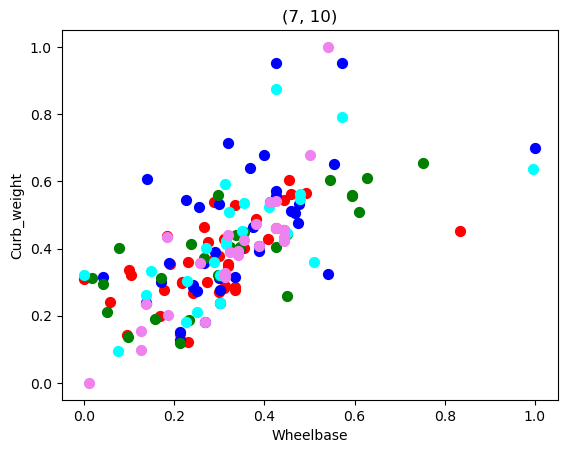

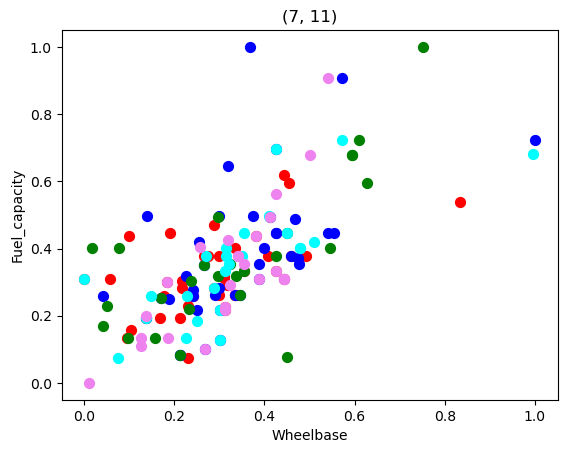

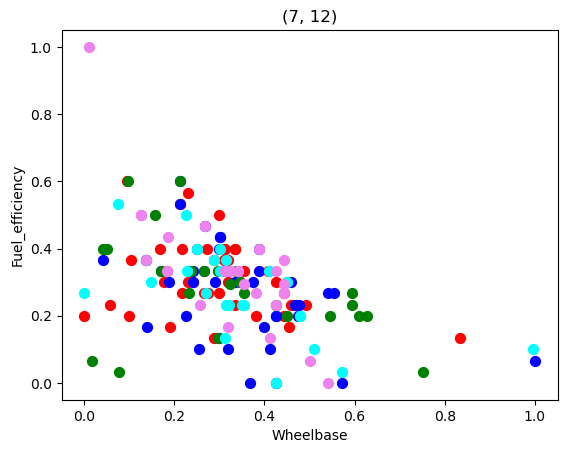

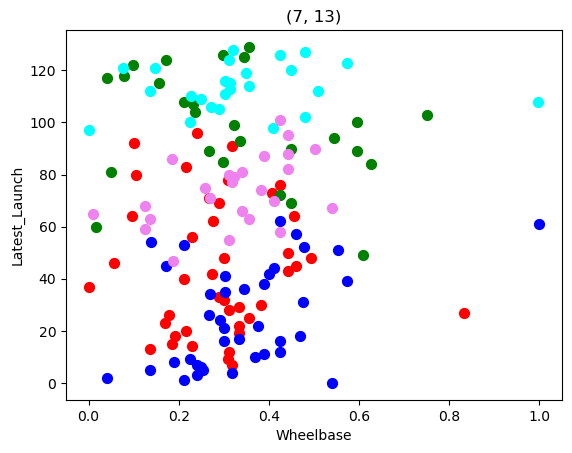

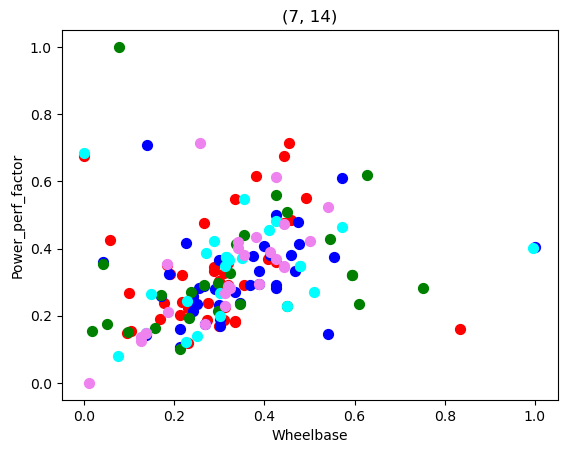

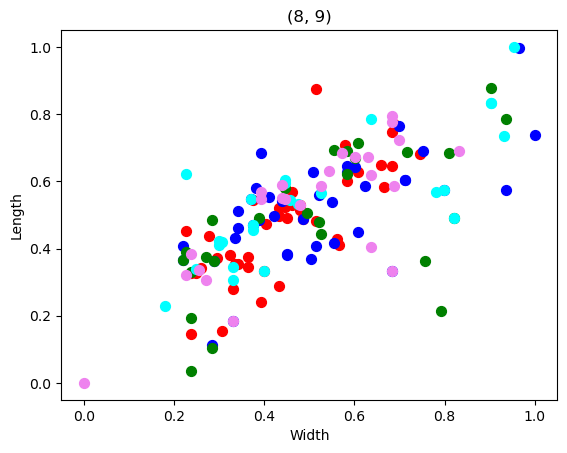

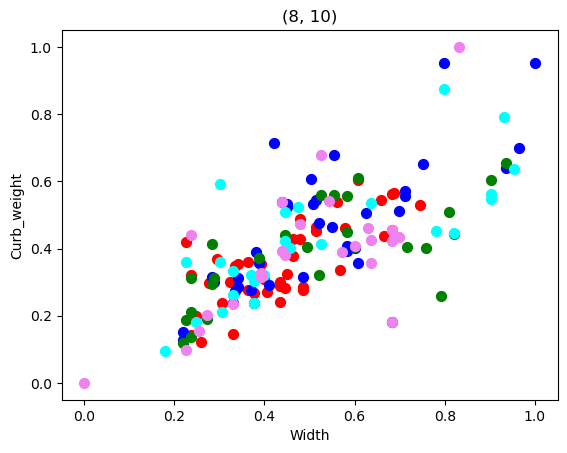

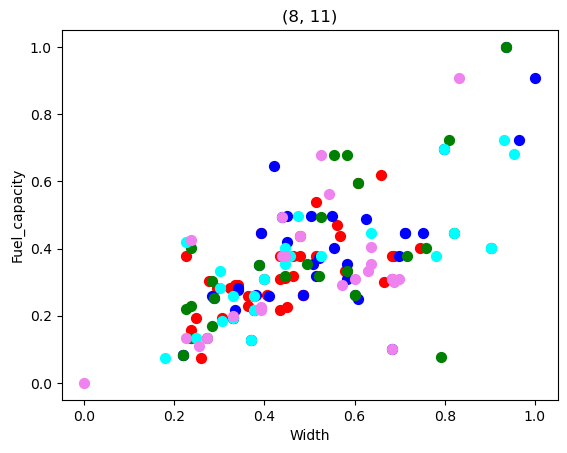

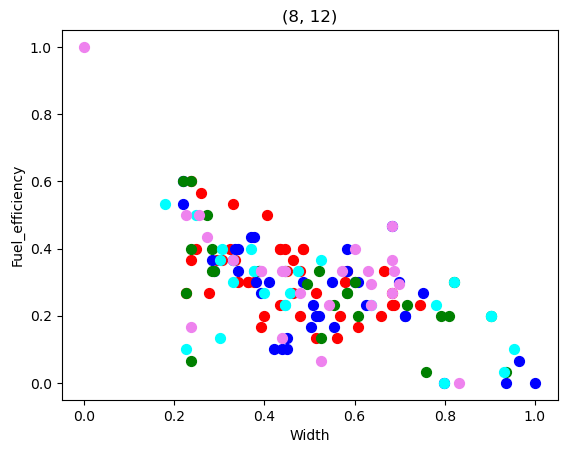

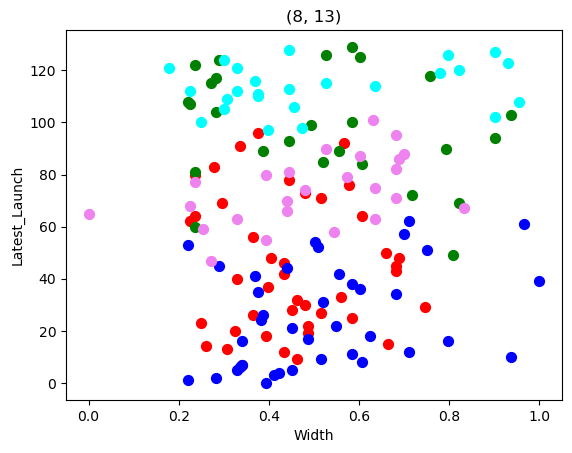

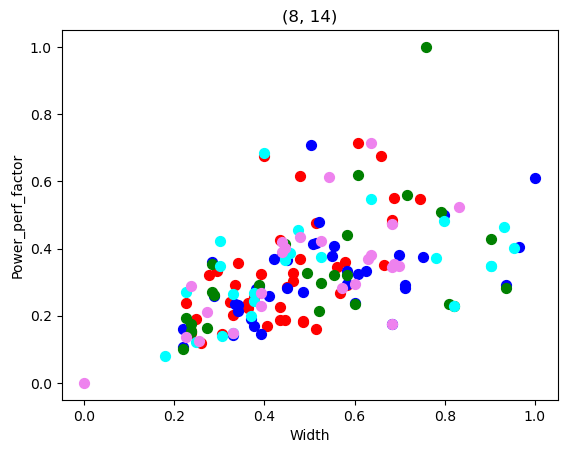

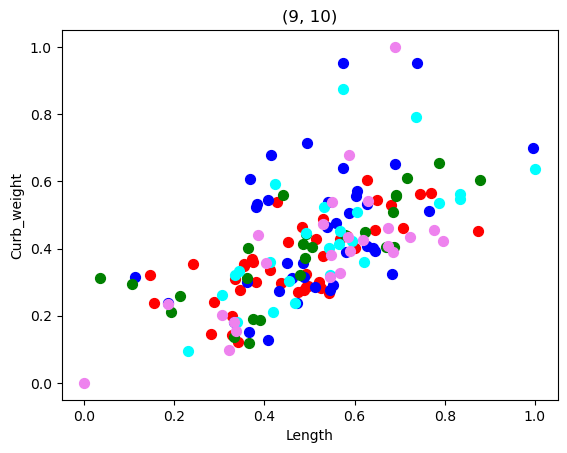

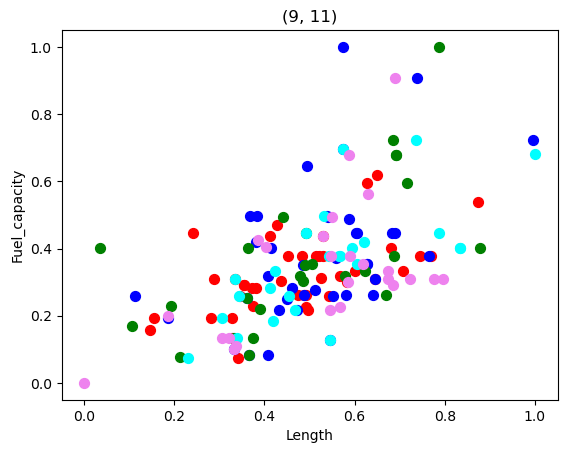

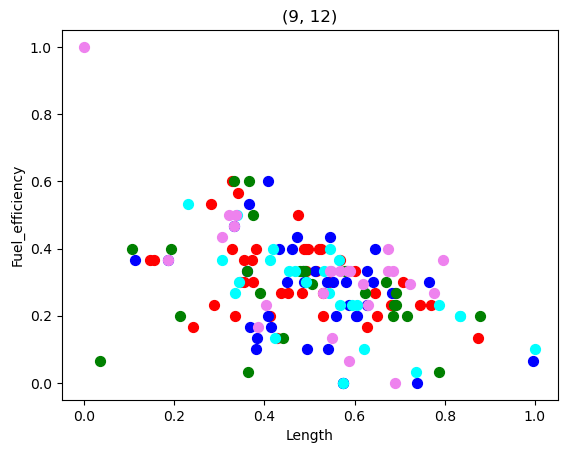

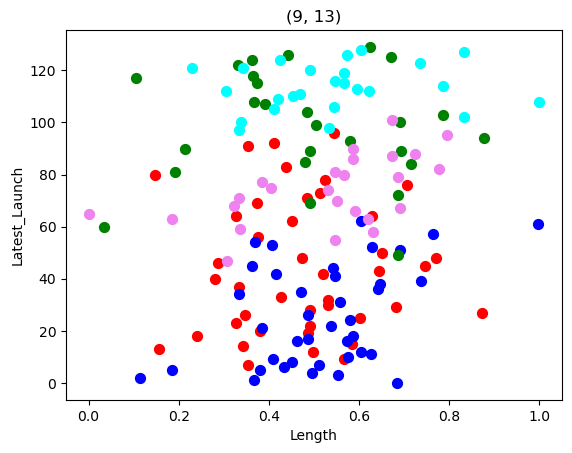

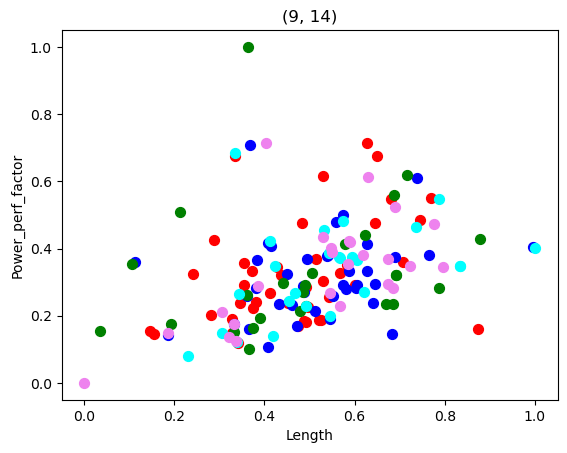

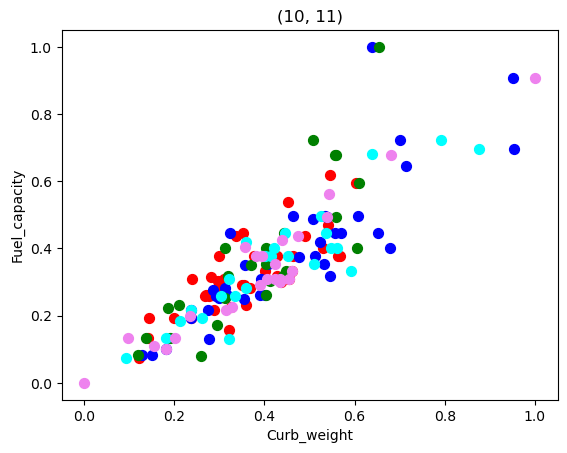

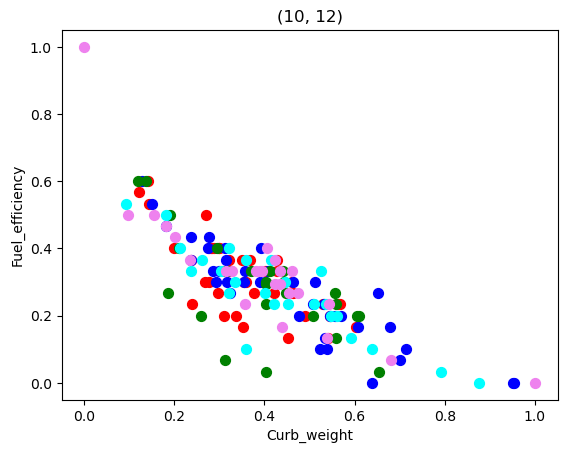

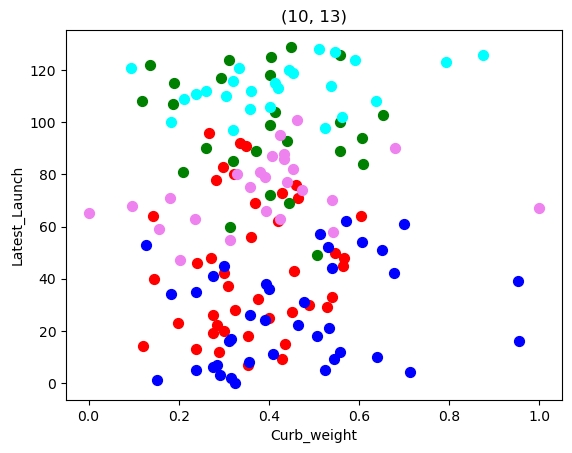

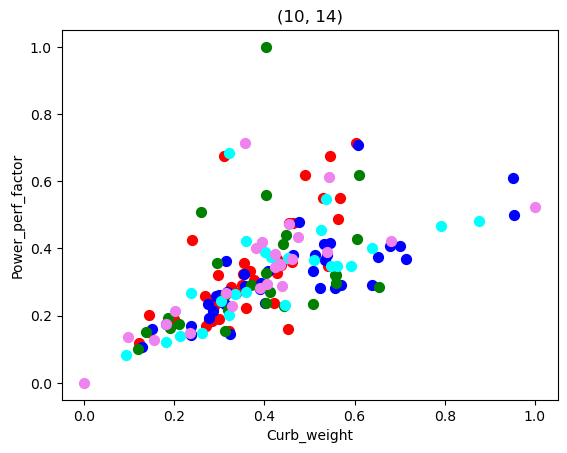

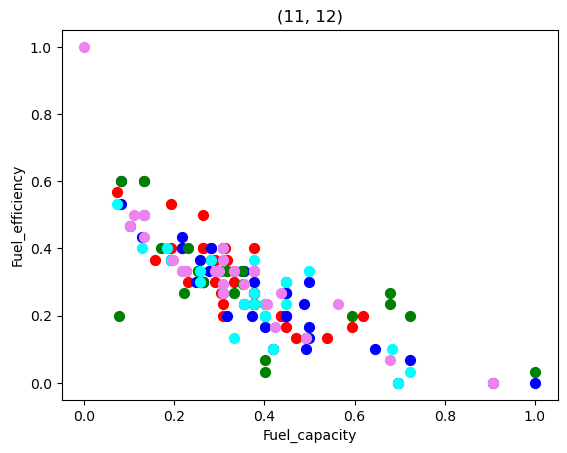

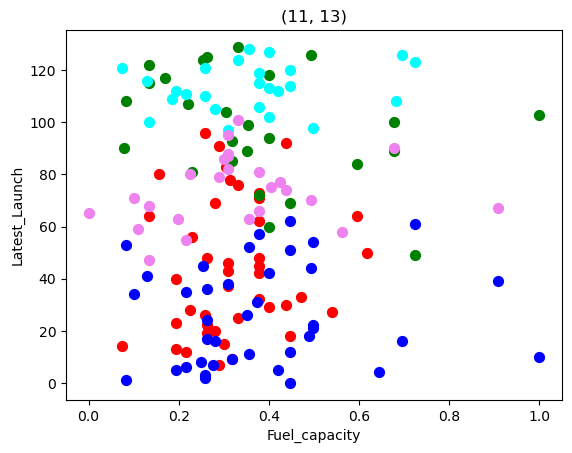

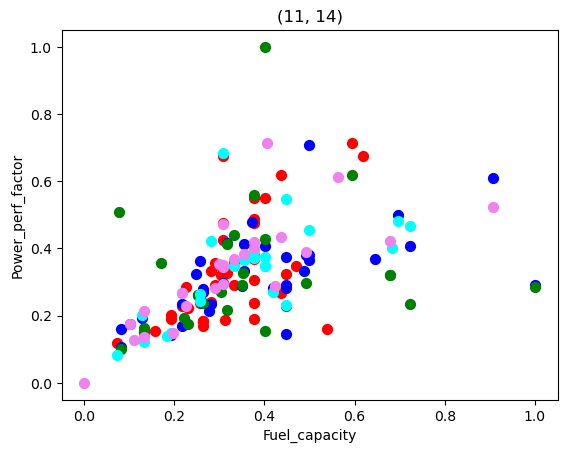

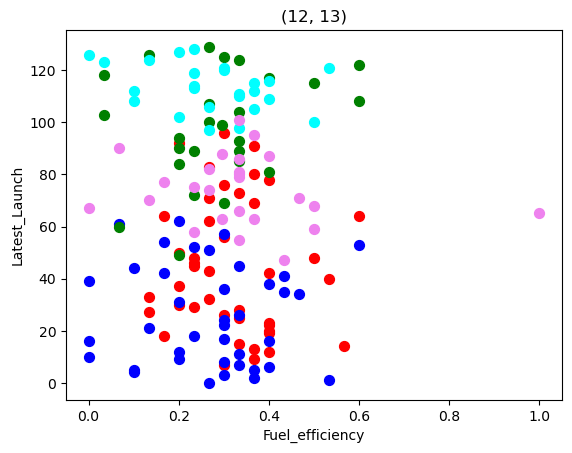

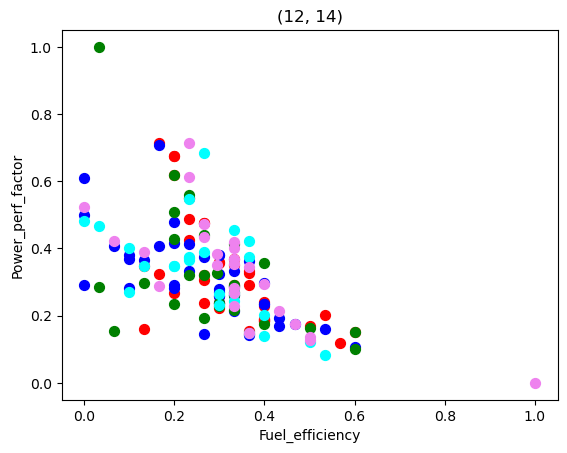

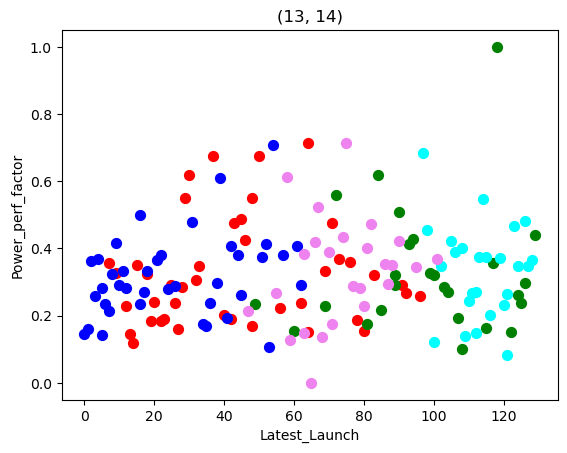

In [13]:
for item in coms:
    plt.scatter(X[y_hc == 0, item[0]], X[y_hc == 0, item[1]], s = 50, c = 'red')
    plt.scatter(X[y_hc == 1, item[0]], X[y_hc == 1,item[1]], s = 50, c = 'blue' )
    plt.scatter(X[y_hc == 2,item[0]], X[y_hc == 2,item[1]], s = 50, c = 'green')
    plt.scatter(X[y_hc == 3,item[0]], X[y_hc == 3,item[1]], s = 50, c = 'cyan')
    plt.scatter(X[y_hc == 4,item[0]], X[y_hc == 4,item[1]], s = 50, c = 'violet')
    plt.title(item)
    plt.xlabel(cars.iloc[:,item[0]]._name)
    plt.ylabel(cars.iloc[:,item[1]]._name)
    #plt.legend()
    plt.show()


### Best possible combination of attributes for good interpretation

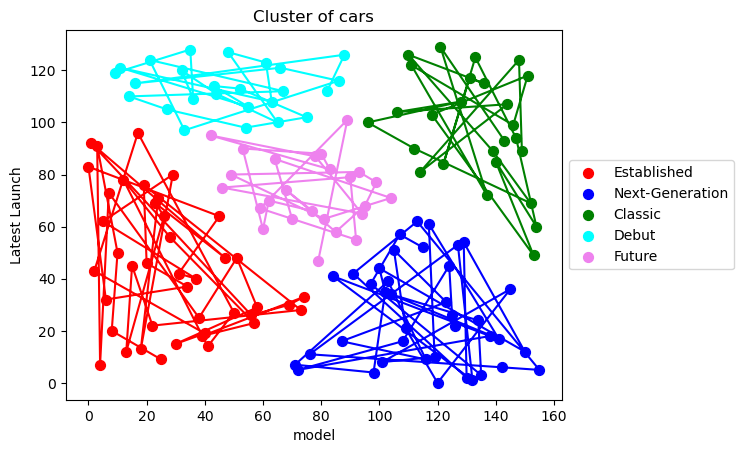

In [14]:
plt.scatter(X[y_hc == 0,1], X[y_hc == 0,13], s = 50, c = 'red', label = 'Established')
plt.scatter(X[y_hc == 1,1], X[y_hc == 1,13], s = 50, c = 'blue', label = 'Next-Generation')
plt.scatter(X[y_hc == 2,1], X[y_hc == 2,13], s = 50, c = 'green', label = 'Classic')
plt.scatter(X[y_hc == 3,1], X[y_hc == 3,13], s = 50, c = 'cyan', label = 'Debut')
plt.scatter(X[y_hc == 4,1], X[y_hc == 4,13], s = 50, c = 'violet', label = 'Future')
plt.plot(X[y_hc == 0,1], X[y_hc == 0,13],c="red")
plt.plot(X[y_hc == 1,1], X[y_hc == 1,13],c="blue")
plt.plot(X[y_hc == 2,1], X[y_hc == 2,13],c="green")
plt.plot(X[y_hc == 3,1], X[y_hc == 3,13],c="cyan")
plt.plot(X[y_hc == 4,1], X[y_hc == 4,13],c="violet")
plt.title("Cluster of cars")
plt.xlabel('model')
plt.ylabel('Latest Launch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Interpretation :
The above graph dipicts one way of representing the clusters we have identified

Debut: New and untested cars with innovative designs or technologies.

Next-generation: Latest iterations of existing models that draw on established reputations.

Future: Unreleased cars that generate excitement and anticipation.

Classic: Established cars with long-standing reputations and loyal customer bases.